# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
#1 to 2 python ignore last so only 1
# we can write it like
# training_set = dataset_train.iloc[:, [1]].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
#No return required last LSTM so return_sequences will not be here
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
# For RNN best optimizer is RMSprop but 'adam' universal good optimizer so we use it
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


### Fitting the RNN to the Training set

In [14]:
!pip install tensorflow

In [15]:
!pip install --upgrade tensorflow

In [16]:

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.1185
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0073
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0064
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0051
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0052
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0053
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0051
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0064
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0051
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0039
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0039
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0039
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0041
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0046
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - lo

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [24]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) #axis o vertical concate(colum)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1) # previously .loc isn't used so numpy reshape needed
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80): #test has 20 data point so (60+20=80 upper bound)
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


#Comparison

In [25]:
import pandas as pd

# After predicting stock prices:

# Create a DataFrame with both real and predicted prices
df_comparison = pd.DataFrame({'Real Stock Price': real_stock_price.reshape(len(real_stock_price)),
                             'Predicted Stock Price': predicted_stock_price.reshape(len(predicted_stock_price))})

# Display the DataFrame
print(df_comparison)

    Real Stock Price  Predicted Stock Price
0             778.81             794.822083
1             788.36             792.554626
2             786.08             792.252686
3             795.26             792.989929
4             806.40             795.586182
5             807.86             800.630920
6             805.00             805.992554
7             807.14             809.304565
8             807.48             810.861145
9             807.08             811.285583
10            805.81             811.099060
11            805.12             810.557373
12            806.91             809.969666
13            807.25             809.973450
14            822.30             810.515991
15            829.62             814.082520
16            837.81             820.043091
17            834.71             827.202026
18            814.66             832.337952
19            796.86             831.009888


### Visualising the results

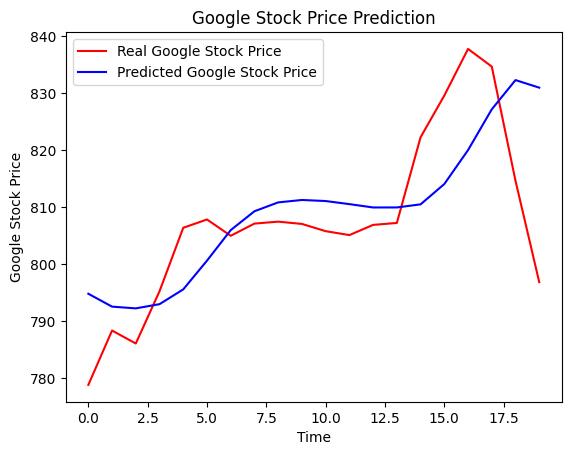

In [26]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()